<a href="https://colab.research.google.com/github/NeuroFan/Algorithmic-SAR-ADC-simulation-files/blob/master/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! [ ! -z "$COLAB_GPU" ] && pip install torch scikit-learn==0.20.* skorch

     |████████████████████████████████| 5.4 MB 4.6 MB/s 
     |████████████████████████████████| 128 kB 20.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

In [ ]:
mnist = fetch_openml('mnist_784', cache=False)
mnist.data.shape
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X /= 255.0
X.min(), X.max()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
 
#assert(X_train.shape[0] + X_test.shape[0] == mnist.data.shape[0])
#X_m=X
#y_m=y

(0.0, 1.0)

In [ ]:
i=-1
T=4
xt=np.zeros((280000,784), dtype=float)
yt=np.zeros((280000),dtype=int)
yt9=np.zeros((280000),dtype=int)
from PIL import Image
for temp in X:
  i+=1;
  #if i==2:
    #break
  img=temp.reshape(28, 28)
  #plt.imshow(img)
  j=0;
  for j in range(T):
      img=np.rot90(img)
      T1=img.reshape(1,784)
      xt[T*i+j,:]=T1[0]
      #print(T*i,j)
      yt[T*i+j]=y[i]*T+j
      
  
 
#plt.imshow(img)
#xt[0,:]=img.reshape(28*28).shape
#X[0,:].shape

26


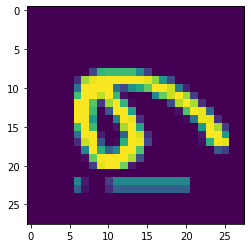

In [ ]:
i=20582
plt.imshow(xt[i,:].reshape(28,28))
print(yt[i])



In [ ]:
X=xt
y=yt
#T=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
assert(X_train.shape[0] + X_test.shape[0] == mnist.data.shape[0]*T)


280000


(5, 784)

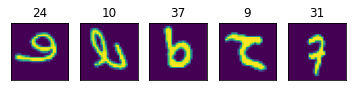

In [ ]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)
plot_example(X_train, y_train)
print(X.shape[0])
(X[:5].shape)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.6092       0.5208        1.5617  4.0473
      2        1.3383       0.6513        1.1402  3.8278
      3        1.0946       0.6917        1.0069  3.8002
      4        0.9925       0.7162        0.9518  3.7145
      5        0.9438       0.7218        0.9344  3.7091
      6        0.9127       0.7392        0.8827  3.8651
      7        0.8870       0.7323        0.8963  3.7727
      8        0.8689       0.7513        0.8419  3.8352
      9        0.8519       0.7461        0.8665  3.8580
     10        0.8403       0.7528        0.8430  3.7412
     11        0.8334       0.7450        0.8749  3.7834
     12        0.8235       0.7652        0.8074  3.7141
     13        0.8149       0.7571        0.8254  3.8487
     14        0.8106       0.7726        0.7669  3.7129
     15        0.8008       0.7655        0.7867  3.8239
     16        0.7951       0.7

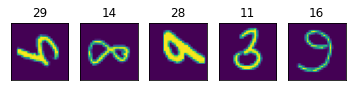

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
mnist_dim = X.shape[1]
hidden_dim = int(mnist_dim/8)
output_dim = T*len(np.unique(mnist.target))
mnist_dim, hidden_dim, output_dim
class ClassifierModule(nn.Module):
    def __init__(
            self,
            input_dim1=mnist_dim,
            hidden_dim=hidden_dim,
            output_dim=output_dim,
            dropout=0,
    ):
        super(ClassifierModule, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim1, 8)
        self.hidden1 =nn.Linear(8, 16)
        self.hidden2 =nn.Linear(16, 12)
        self.hidden3 =nn.Linear(12, 8)
        self.output4 = nn.Linear(8, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = F.relu(self.hidden1(X))
        X = F.relu(self.hidden2(X))
        X = F.relu(self.hidden3(X))
        

        X = self.dropout(X)
        if test_flag==True:
                  X+=torch.randn(X.shape)
                  #X=torch.float64(X)
        X = F.softmax(self.output4(X), dim=-1)
        return X
from skorch import NeuralNetClassifier

torch.manual_seed(0)

net = NeuralNetClassifier(
    ClassifierModule,
    max_epochs=150,
    lr=0.15,
    device=device,
)
test_flag=False
net.fit(np.float32(X_train), y_train);

from sklearn.metrics import accuracy_score
test_flag=False  # with noise in test time  
y_pred = net.predict(np.float32(X_test))
print(accuracy_score(y_test, y_pred))
error_mask = y_pred != y_test
plot_example(X_test[error_mask], y_pred[error_mask])


In [ ]:
h1=net.module_.hidden.weight
print(h1.detach().numpy().shape)
np.savetxt("111.csv",h1.detach().numpy(), delimiter=',')
h2= net.module_.hidden1.weight
np.savetxt("222.csv",h2.detach().numpy(), delimiter=',')
h3= net.module_.hidden2.weight
np.savetxt("333.csv",h3.detach().numpy(), delimiter=',')
h4= net.module_.hidden3.weight
np.savetxt("444.csv",h4.detach().numpy(), delimiter=',')
h5= net.module_.output4.weight
np.savetxt("555.csv",h5.detach().numpy(), delimiter=',')



(8, 784)


In [ ]:
b1 = net.module_.hidden.bias;
print(b1)

b2 = net.module_.hidden1.bias;
print(b2)

b3 = net.module_.hidden2.bias;
print(b3)

b4 = net.module_.hidden3.bias;
print(b4)


b5 = net.module_.output4.bias;
print(b5)


Parameter containing:
tensor([2.9851, 0.8467, 1.8964, 2.9366, 3.7874, 0.6813, 1.9752, 0.5708],
       requires_grad=True)
Parameter containing:
tensor([-0.8909,  3.1375, -0.9986,  1.4742,  6.6393,  5.6268,  2.5455, -2.2740,
         5.2660,  0.1251,  2.4599,  7.3509, -2.3175, -4.1341,  2.2511, -3.4067],
       requires_grad=True)
Parameter containing:
tensor([ 1.2774, -1.9519, -0.7424, -0.5910, -0.1406,  1.4695,  1.7393,  2.1252,
         4.3853, -1.1400,  1.0052, -2.1643], requires_grad=True)
Parameter containing:
tensor([ 1.5017,  0.1662,  2.6586,  2.5365,  1.3033,  3.9124, -0.1954, -0.8800],
       requires_grad=True)
Parameter containing:
tensor([ 1.5805e+00,  1.5317e+00, -2.7760e+00,  1.0533e+00, -9.8251e-02,
         4.9737e-01, -1.3128e+00,  2.0145e+00,  1.5262e-01, -1.8041e+00,
         8.4457e-02, -3.3549e+00,  3.7815e+00,  4.7976e+00, -6.8797e-01,
        -5.7070e-01, -3.4836e+00, -1.6651e+00, -7.1152e-01, -6.2390e-01,
         4.9149e+00,  4.3996e+00,  4.0420e+00,  4.8088e+0

# New Section

In [ ]:
output_dim = T*len(np.unique(mnist.target))
print(max(y_train))

39


In [ ]:
print(accuracy_score(y_test, y_pred))


0.8076607142857143


In [ ]:
Y_classify_test=np.zeros(y_test.shape)
Y_classify_pred=np.zeros(y_test.shape)
Y_ssl_test=np.zeros(y_test.shape)
Y_ssl_pred=np.zeros(y_test.shape)

for count in range(10):
  Y_classify_test[(y_test>=count*T) & (y_test<(count+1)*T)]=count
  Y_classify_pred[(y_pred>=count*T) & (y_pred<(count+1)*T)]=count

for c in range(T):
  Y_ssl_test[y_test % T==c]=np.int(c)
  Y_ssl_pred[y_pred % T==c]=np.int(c)

Total accuracy: 0.8076607142857143
Classifcation Accuravy: 0.8111428571428572
SSL Task accuracy: 0.9840535714285714


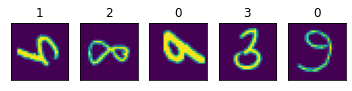

In [ ]:
print("Total accuracy:", accuracy_score(y_test, y_pred))
print("Classifcation Accuravy:", accuracy_score(Y_classify_test, Y_classify_pred))
print("SSL Task accuracy:", accuracy_score(Y_ssl_test,Y_ssl_pred))


error_mask = y_pred != y_test
plot_example(X_test[error_mask], y_pred[error_mask]%T)



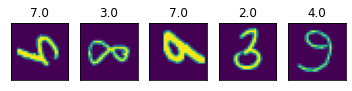

In [ ]:
error_mask = Y_classify_test != Y_classify_pred
plot_example(X_test[error_mask], Y_classify_pred[error_mask])

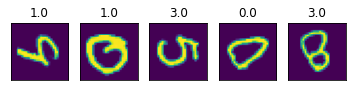

In [ ]:
error_mask = Y_ssl_test != Y_ssl_pred
plot_example(X_test[error_mask], Y_ssl_pred[error_mask])

In [ ]:
a0 = [1 ,0.5, .1, -1 ,0]
a = torch.tensor(np.asarray(a0))
b = F.softmax(a)
print(b)

tensor([0.3974, 0.2410, 0.1616, 0.0538, 0.1462], dtype=torch.float64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until
